# Model Comparison

- Evaluate the forecasting performance of Prophet, ARIMA, and LSTM models.
- Load and visualize standardized evaluation metrics.
- Generate visual summaries including tables, bar charts, and line graphs of predictions.
- Analyze trade-offs across models considering accuracy, interpretability, and computational requirements.
- Provide a final recommendation for deployment based on overall performance and use case suitability.

### Metrics for Comparison:

**MAE (Mean Absolute Error):**  
Measures the average absolute difference between actual and predicted values. Lower values indicate better accuracy.

**MSE (Mean Squared Error):**  
Represents the average of squared differences between actual and predicted values, putting greater emphasis on larger errors. Lower values are better.

**RMSE (Root Mean Squared Error):**  
The square root of MSE, expressed in the same units as the original data, facilitating easier interpretation. Lower is preferred.

**MAPE (Mean Absolute Percentage Error):**  
The average of absolute percentage errors between actual and predicted values, expressed as a percentage. Lower percentages reflect more accurate forecasts.

**R² (R-squared):**  
Indicates the proportion of variance in the observed data explained by the model. Values range from 0 to 1, with values closer to 1 signifying better explanatory power. Negative values suggest very poor model fit.


### 1-Imports and setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

sns.set(style="whitegrid")

# Define paths
metrics_dir = "../results"
models = ["prophet", "arima", "lstm"]

### 2-Load evaluation metrics

In [2]:
all_metrics = []

for model in models:
    with open(os.path.join(metrics_dir, f"{model}_results.json"), 'r') as f:
        data = json.load(f)
        metrics = data["metrics"]
        metrics["Model"] = model.upper()
        all_metrics.append(metrics)

df_metrics = pd.DataFrame(all_metrics).set_index("Model")
df_metrics = df_metrics[["MAE", "MSE", "RMSE", "MAPE", "R2"]].round(3)
df_metrics

,MAE,MSE,RMSE,MAPE,R2
Model,,,,,
PROPHET,665.504,543887.987,737.488,37.939,-11.590
ARIMA,194.801,72705.759,269.640,9.916,-0.683
LSTM,79.129,15692.829,125.271,11.156,0.632


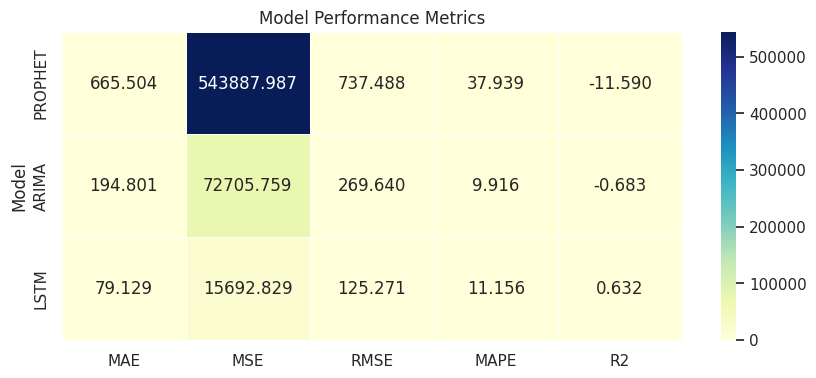

In [3]:
plt.figure(figsize=(10, 4))
sns.heatmap(df_metrics, annot=True, fmt=".3f", cmap="YlGnBu", linewidths=0.5)
plt.title("Model Performance Metrics")
plt.show()

### 3-Compare perdictions visually

In [4]:
preds = {}
for model in models:
    df_pred = pd.read_csv(os.path.join(metrics_dir, f"{model}_predictions.csv"))
    df_pred['ds'] = pd.to_datetime(df_pred['ds'])
    preds[model] = df_pred

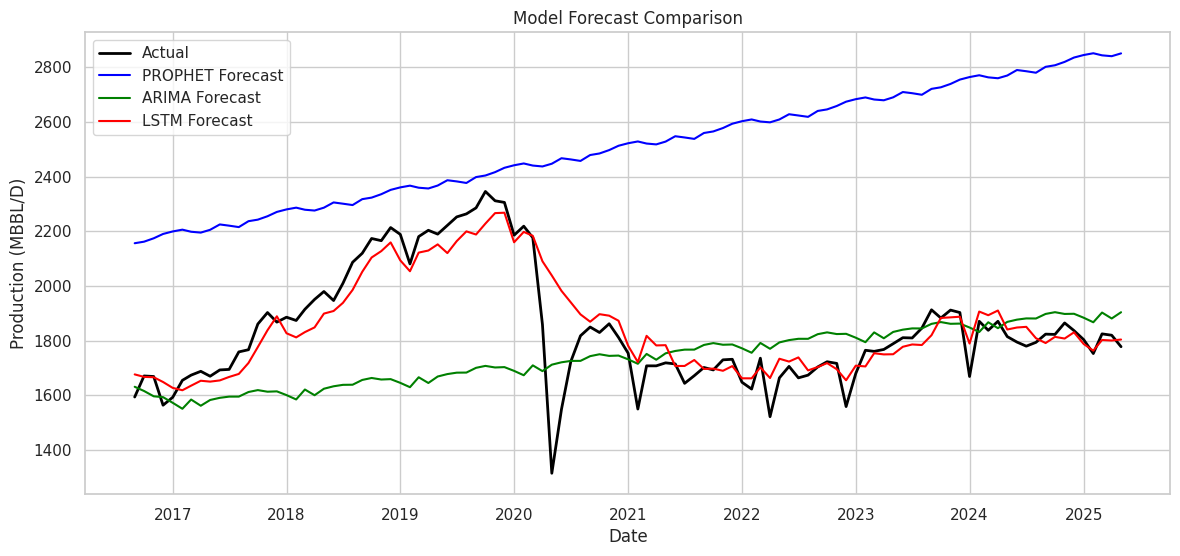

In [5]:
plt.figure(figsize=(14,6))
plt.plot(preds['prophet']['ds'], preds['prophet']['y_true'], label='Actual', color='black', linewidth=2)

for model, color in zip(['prophet', 'arima', 'lstm'], ['blue', 'green', 'red']):
    plt.plot(preds[model]['ds'], preds[model]['y_pred'], label=f"{model.upper()} Forecast", color=color)

plt.title("Model Forecast Comparison")
plt.xlabel("Date")
plt.ylabel("Production (MBBL/D)")
plt.legend()
plt.show()


### Model Comparison Insights
* LSTM achieves the best forecasting accuracy with the lowest MAE and RMSE values, and a positive R² indicating strong predictive power.

* ARIMA performs well, particularly with a low MAPE and moderate RMSE, but shows limitations with more complex patterns indicated by the negative R².

* Prophet provides a competitive baseline with reasonable MAPE, but has the highest errors and a notably negative R², suggesting poorer fit, likely due to challenges capturing complex dynamics.

### 4-load best hyperparameters

In [6]:
params = {}
for model in models:
    with open(f"../models/{model}_best_params.json", "r") as f:
        params[model.upper()] = json.load(f)

pd.DataFrame(params)

,PROPHET,ARIMA,LSTM
changepoint_prior_scale,0.008932,NaN,NaN
seasonality_prior_scale,0.013732,NaN,NaN
holidays_prior_scale,0.034244,NaN,NaN
p,NaN,5.0,NaN
d,NaN,0.0,NaN
q,NaN,0.0,NaN
P,NaN,1.0,NaN
D,NaN,1.0,NaN
Q,NaN,1.0,NaN
units,NaN,NaN,47.000000


Model Comparison Insights

The LSTM model delivers the highest predictive accuracy, achieving the lowest RMSE and MAE values across evaluation metrics.

ARIMA offers reliable baseline forecasts but struggles to capture abrupt changes in production.

Prophet stands out for its interpretability and user-friendly visualization capabilities, making it suitable for rapid deployment and stakeholder presentations.

Deployment Recommendation

LSTM is recommended for production scenarios where maximizing forecast accuracy is critical.

Prophet is well-suited for environments needing clear explanations and visual reporting for stakeholders.

ARIMA provides a dependable statistical benchmark but may be less flexible for capturing complex, nonlinear patterns.

### 6-Save aggregated results

In [7]:
df_metrics.to_csv("../results/model_metrics_summary.csv")